In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 生成数据

In [35]:
x = np.random.randn(2000).reshape(-1, 2) 
tar_w = [-2.1, 2.3, 42.0]

In [36]:
x = np.hstack([x, np.ones(shape=(x.shape[0], 1))])
x.shape

(1000, 3)

In [37]:
y = x @ tar_w + np.random.normal(0, 1, size=x.shape[0])

## 最小二乘法

In [38]:
theta = np.linalg.inv(x.T @ x) @ x.T @ y
theta

array([-2.09791276,  2.24557164, 42.03124469])

## 初始化参数

In [39]:
w = np.random.randn(3)
w

array([-1.3815351 ,  1.12247604, -0.12654543])

## 设定学习率

In [40]:
alpha = 0.1

## 梯度下降

In [41]:
y_hat = x @ w
J = 1/2 * ((y_hat - y) ** 2).mean()
Jw = ((y_hat - y).reshape(-1, 1) * x ).mean(axis=0)
Jw

array([ -3.01554885,  -1.16366499, -42.09287052])

In [42]:
epochs = 50

In [43]:
loss_lst = []
for epoch in range(epochs):
    y_hat = x @ w
    J = 1/2 * ((y_hat - y) ** 2).mean()
    loss_lst.append(J)
    Jw = ((y_hat - y).reshape(-1, 1) * x ).mean(axis=0)
    w = w - alpha * Jw

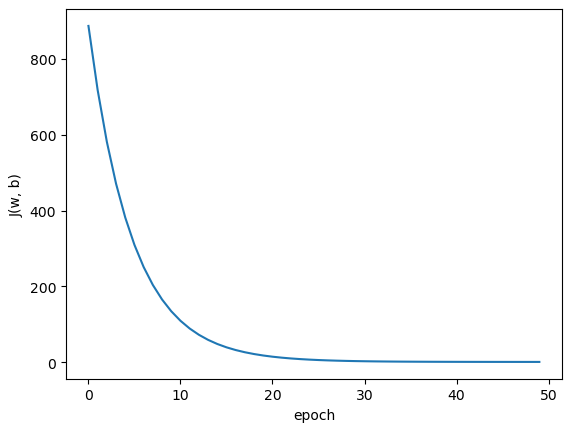

In [44]:
plt.plot(range(epochs), loss_lst)
plt.xlabel('epoch')
plt.ylabel('J(w, b)')
plt.show()

In [45]:
w, tar_w

(array([-1.9713159 ,  2.24577472, 41.78412606]), [-2.1, 2.3, 42.0])

In [46]:
np.all(np.abs(w - tar_w) < 0.3)

True

## 拟牛顿法

In [47]:
epochs = 100  # 迭代次数
alpha = 0.1   # 学习率（不再需要，牛顿法使用Hessian）
loss_lst = []
n_samples, n_features = x.shape

# 初始化权重
w = np.random.randn(n_features)

In [48]:
# 用于早停的变量
best_loss = float('inf')  # 初始化最好的损失为无穷大
patience_counter = 0  # 初始化耐心计数器

for epoch in range(epochs):
    y_hat = x @ w
    J = 1 / 2 * np.mean((y_hat - y) ** 2)  # 计算损失
    loss_lst.append(J)
    
    # 计算梯度
    gradient = (x.T @ (y_hat - y)) / n_samples
    
    # 计算Hessian矩阵
    hessian = (x.T @ x) / n_samples
    
    # 更新权重
    # 使用numpy的线性方程求解功能
    w -= np.linalg.inv(hessian) @ gradient
    
    # 早停检查
    if J < best_loss:
        best_loss = J  # 更新最好的损失
        patience_counter = 0  # 重置耐心计数器
    else:
        patience_counter += 1  # 增加耐心计数器
        
    # 如果耐心计数器达到设定的耐心值，则停止训练
    if patience_counter >= 2:
        print(f"早停在第 {epoch} 次迭代，最好的损失为 {best_loss}")
        break


早停在第 4 次迭代，最好的损失为 0.5216062657761035


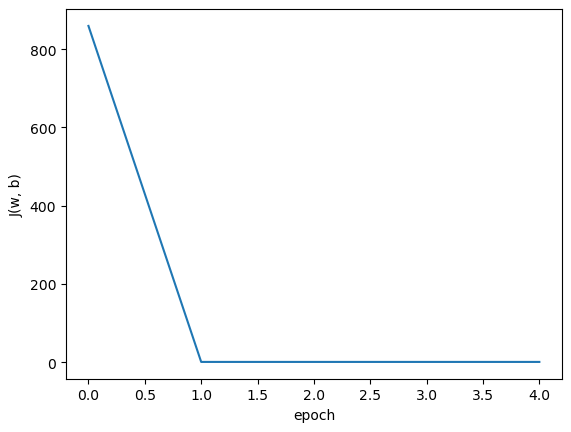

In [49]:
plt.plot(range(len(loss_lst)), loss_lst)
plt.xlabel('epoch')
plt.ylabel('J(w, b)')
plt.show()